In [91]:
import pandas as pd
import numpy as np 

In [92]:
df_raw = pd.read_csv('/Volumes/Unicorn/IoTScenarios/Experiment/pcap.csv')
df_raw = df_raw[df_raw['ip_version']==4.0]
del df_raw['ts']
del df_raw['pcap_row_id']
del df_raw['ip_src']
del df_raw['ip_dst']

# del df_raw['ip_version']
# del df_raw['ip_ihl']
# del df_raw['ip_frag']
# del df_raw['tcp_reserved']
# del df_raw['tcp_urgptr']

# del df_raw['icmp_nexthopmtu']
# del df_raw['icmp_reserved']
# del df_raw['icmp_code']
# del df_raw['icmp_type']
# del df_raw['icmp_length']

# del df_raw['ip_chksum']
# del df_raw['tcp_chksum']
# del df_raw['udp_chksum']
# del df_raw['icmp_chksum']

df_raw = df_raw.fillna(0)

df_raw['detailed-label'].value_counts()

/var/folders/11/1w8hy18j0r12wk4g7x6gd06h0000gn/T/ipykernel_23366/2620002225.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/Volumes/Unicorn/IoTScenarios/Experiment/pcap.csv')


PartOfAHorizontalPortScan    145719
Benign                        19279
C&C                           14936
DDoS                          14394
Attack                         5962
C&C-Torii                        30
C&C-FileDownload                  4
FileDownload                      2
Name: detailed_label, dtype: int64

In [93]:
df_raw['icmp_code'].value_counts()

0.0     199679
1.0        416
13.0       175
3.0         45
10.0        11
Name: icmp_code, dtype: int64

In [94]:
df_raw[df_raw['icmp_length']>=0]['detailed-label'].value_counts()

PartOfAHorizontalPortScan    145719
Benign                        19279
C&C                           14936
DDoS                          14394
Attack                         5962
C&C-Torii                        30
C&C-FileDownload                  4
FileDownload                      2
Name: detailed_label, dtype: int64

In [95]:
df_raw = df_raw[(df_raw['detailed-label']=="Attack")|(df_raw['detailed-label']=="Benign")|(df_raw['detailed-label']=="C&C")|(df_raw['detailed_label']=="DDoS")]
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'Benign',value= -1)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed_label'] = df_raw['detailed_label'].replace(to_replace= 'DDoS',value= 4)

df_raw.corr()

,detailed_label,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_frag,ip_ttl,ip_proto,ip_chksum,...,udp_sport,udp_dport,udp_len,udp_chksum,icmp_type,icmp_code,icmp_chksum,icmp_reserved,icmp_length,icmp_nexthopmtu
detailed_label,1.000000,NaN,NaN,-0.574372,0.630049,0.419848,0.004588,0.602811,-0.689361,0.219042,...,-0.378140,-0.059841,-0.722704,-0.626832,-0.165314,-0.092352,-0.167743,-0.015333,-0.022519,-0.005568
ip_version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_ihl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_tos,-0.574372,NaN,NaN,1.000000,-0.251081,-0.170135,-0.001890,-0.271800,0.765720,-0.050066,...,-0.124165,0.027078,0.819308,0.630914,-0.055957,-0.031349,-0.056727,-0.005205,-0.007644,-0.001890
ip_len,0.630049,NaN,NaN,-0.251081,1.000000,0.655613,0.008171,0.966693,-0.305045,0.288526,...,-0.172152,-0.023727,-0.317849,-0.278059,-0.073845,-0.042289,-0.074512,-0.006318,-0.009233,-0.002629
ip_id,0.419848,NaN,NaN,-0.170135,0.655613,1.000000,-0.000709,0.628913,-0.192934,0.266738,...,-0.103115,-0.020267,-0.208856,-0.179977,-0.076901,-0.052544,-0.079424,-0.001327,-0.002214,-0.008013
ip_frag,0.004588,NaN,NaN,-0.001890,0.008171,-0.000709,1.000000,-0.002632,0.007465,-0.002464,...,-0.001244,-0.000197,-0.002378,-0.002063,-0.000544,-0.000304,-0.000552,-0.000050,-0.000074,-0.000018
ip_ttl,0.602811,NaN,NaN,-0.271800,0.966693,0.628913,-0.002632,1.000000,-0.347166,0.240833,...,-0.178677,-0.027863,-0.339640,-0.295641,0.068581,0.042061,0.046303,0.013159,0.022689,0.005858
ip_proto,-0.689361,NaN,NaN,0.765720,-0.305045,-0.192934,0.007465,-0.347166,1.000000,-0.009707,...,0.506953,0.080225,0.968892,0.840361,-0.198718,-0.111013,-0.201637,-0.018431,-0.027070,-0.006694
ip_chksum,0.219042,NaN,NaN,-0.050066,0.288526,0.266738,-0.002464,0.240833,-0.009707,1.000000,...,-0.021566,-0.003427,-0.057535,-0.048942,-0.252061,-0.140861,-0.255737,-0.023386,-0.034348,-0.008493


In [96]:
df_raw['detailed_label'].value_counts()

-1    19279
 3    14936
 4    14394
 2     5962
Name: detailed_label, dtype: int64

<AxesSubplot:>

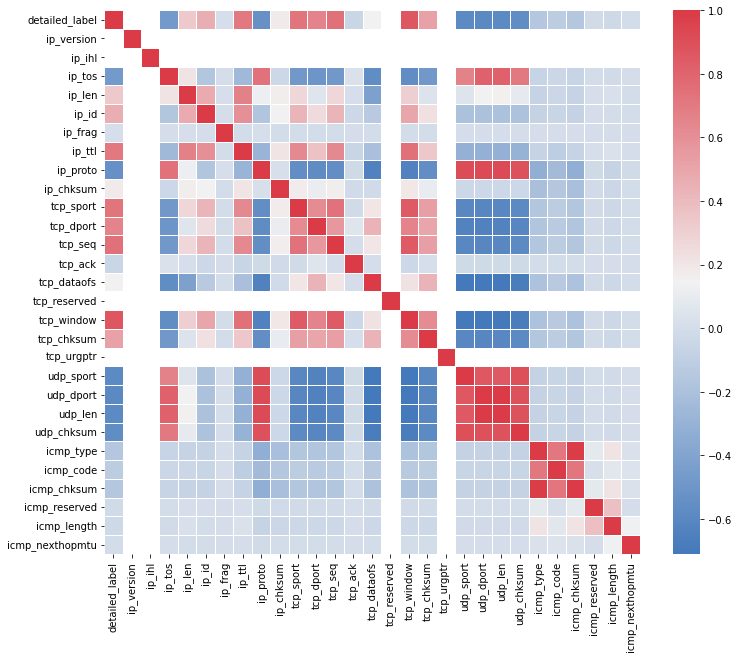

In [97]:
# 

# 
# # plot the heatmap and annotation on it
# sns.heatmap()

import seaborn as sns
import matplotlib.pyplot as plt
# Var_Corr = df_raw.corr(method='spearman')
Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap)



<AxesSubplot:>

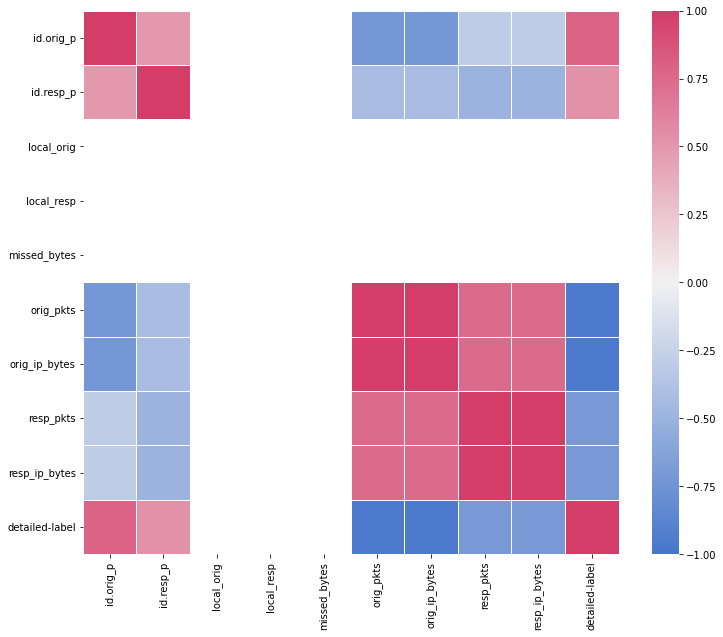

In [5]:
# 

# 
# # plot the heatmap and annotation on it
# sns.heatmap()
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

df_raw = pd.read_csv('/Volumes/Unicorn/IoTScenarios/Experiment/zeek.csv')
del df_raw['ts']

df_raw = df_raw[(df_raw['detailed-label']=="Attack")|(df_raw['detailed-label']=="Benign")|(df_raw['detailed-label']=="C&C")|(df_raw['detailed-label']=="DDoS")]
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'Attack',value= 2)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= '-',value= -1)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'C&C',value= 3)
df_raw['detailed-label'] = df_raw['detailed-label'].replace(to_replace= 'DDoS',value= 4)
df_raw = df_raw.replace(to_replace= '-',value= np.nan)
# del df_raw['pcap_row_id']
# del df_raw['ip_src']
# del df_raw['ip_dst']

Var_Corr = df_raw.corr(method='spearman')
# Var_Corr = df_raw.corr(method='kendall')
fig, ax = plt.subplots(figsize=(12,10))

cmap = sns.diverging_palette(255, 0, as_cmap=True, center="light")

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, linewidths=1, ax=ax, cmap=cmap,vmax=1,vmin=-1)

